## Bank Telemarketing Campaign Case Study.

In this case study you’ll be learning Exploratory Data Analytics with the help of a case study on "Bank marketing campaign". This will enable you to understand why EDA is a most important step in the process of Machine Learning.

#### Problem Statement:

 

The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit. You need to apply your knowledge of EDA on the given dataset to analyse the patterns and provide inferences/solutions for the future marketing campaign.

The bank conducted a telemarketing campaign for one of its financial products ‘Term Deposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.


**What is the term Deposit?**

Term deposits also called fixed deposits, are the cash investments made for a specific time period ranging from 1 month to 5 years for predetermined fixed interest rates. The fixed interest rates offered for term deposits are higher than the regular interest rates for savings accounts. The customers receive the total amount (investment plus the interest) at the end of the maturity period. Also, the money can only be withdrawn at the end of the maturity period. Withdrawing money before that will result in an added penalty associated, and the customer will not receive any interest returns.

Your target is to do end to end EDA on this bank telemarketing campaign data set to infer knowledge that where bank has to put more effort to improve it's positive response rate. 

#### Importing the libraries.

In [1]:
#import the warnings.


In [2]:
#import the useful libraries.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Session- 2, Data Cleaning 

### Segment- 2, Data Types 

There are multiple types of data types available in the data set. some of them are numerical type and some of categorical type. You are required to get the idea about the data types after reading the data frame. 

Following are the some of the types of variables:
- **Numeric data type**: banking dataset: salary, balance, duration and age.
- **Categorical data type**: banking dataset: education, job, marital, poutcome and month etc.
- **Ordinal data type**: banking dataset: Age group.
- **Time and date type** 
- **Coordinates type of data**: latitude and longitude type.


#### Read in the Data set. 

In [3]:
#read the data set of "bank telemarketing campaign" in inp0.
inp0= pd.read_csv('bank_marketing_updated_v1.csv')

C:\Users\Megha B S\AppData\Local\Temp\ipykernel_13896\2584962221.py:2: DtypeWarning: Columns (0,1,2,3,11,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  inp0= pd.read_csv('bank_marketing_updated_v1.csv')


In [4]:
#Print the head of the data frame.
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Segment- 3, Fixing the Rows and Columns 

Checklist for fixing rows:
- **Delete summary rows**: Total and Subtotal rows
- **Delete incorrect rows**: Header row and footer row
- **Delete extra rows**: Column number, indicators, Blank rows, Page No.

Checklist for fixing columns:
- **Merge columns for creating unique identifiers**, if needed, for example, merge the columns State and City into the column Full address.
- **Split columns to get more data**: Split the Address column to get State and City columns to analyse each separately. 
- **Add column names**: Add column names if missing.
- **Rename columns consistently**: Abbreviations, encoded columns.
- **Delete columns**: Delete unnecessary columns.
- **Align misaligned columns**: The data set may have shifted columns, which you need to align correctly.


#### Read the file without unnecessary headers.

In [5]:
#read the file in inp0 without first two rows as it is of no use.
inp0= pd.read_csv('bank_marketing_updated_v1.csv', skiprows=2)

In [6]:
#print the head of the data frame.
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


In [7]:
#print the information of variables to check their data types.
inp0.info

<bound method DataFrame.info of        customerid   age  salary  balance   marital                  jobedu  \
0               1  58.0  100000     2143   married     management,tertiary   
1               2  44.0   60000       29    single    technician,secondary   
2               3  33.0  120000        2   married  entrepreneur,secondary   
3               4  47.0   20000     1506   married     blue-collar,unknown   
4               5  33.0       0        1    single         unknown,unknown   
...           ...   ...     ...      ...       ...                     ...   
45206       45207  51.0   60000      825   married     technician,tertiary   
45207       45208  71.0   55000     1729  divorced         retired,primary   
45208       45209  72.0   55000     5715   married       retired,secondary   
45209       45210  57.0   20000      668   married   blue-collar,secondary   
45210       45211  37.0  120000     2971   married  entrepreneur,secondary   

      targeted default housing 

In [8]:
#convert the age variable data type from float to integer.
inp0['age']= inp0['age'].fillna(0).astype(int)

In [9]:
#print the average age of custo

#### Dropping customer id column. 

In [10]:
#drop the customer id as it is of no use.
inp0.drop('customerid',axis=1)

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,60000,825,married,"technician,tertiary",yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes
45207,71,55000,1729,divorced,"retired,primary",yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes
45208,72,55000,5715,married,"retired,secondary",yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes
45209,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no


#### Dividing "jobedu" column into job and education categories. 

In [11]:
#Extract job in newly created 'job' column from "jobedu" column.
inp0['job']=inp0.jobedu.apply(lambda x:x.split(',')[0])

In [12]:
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [13]:
#Extract education in newly created 'education' column from "jobedu" column.
inp0['education']= inp0.jobedu.apply(lambda x:x.split(',')[1])

In [14]:
#drop the "jobedu" column from the dataframe.
inp0.drop('jobedu',axis=1)

,customerid,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,yes,no,no,no,cellular,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71,55000,1729,divorced,yes,no,no,no,cellular,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72,55000,5715,married,yes,no,no,no,cellular,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57,20000,668,married,yes,no,no,no,telephone,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


In [17]:
#checking missing values
inp0.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month         50
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

### Segment- 4, Impute/Remove missing values 

Take aways from the lecture on missing values:

- **Set values as missing values**: Identify values that indicate missing data, for example, treat blank strings, "NA", "XX", "999", etc., as missing.
- **Adding is good, exaggerating is bad**: You should try to get information from reliable external sources as much as possible, but if you can’t, then it is better to retain missing values rather than exaggerating the existing rows/columns.
- **Delete rows and columns**: Rows can be deleted if the number of missing values is insignificant, as this would not impact the overall analysis results. Columns can be removed if the missing values are quite significant in number.
- **Fill partial missing values using business judgement**: Such values include missing time zone, century, etc. These values can be identified easily.

Types of missing values:
- **MCAR**: It stands for Missing completely at random (the reason behind the missing value is not dependent on any other feature).
- **MAR**: It stands for Missing at random (the reason behind the missing value may be associated with some other features).
- **MNAR**: It stands for Missing not at random (there is a specific reason behind the missing value).


#### handling missing values in age column.

In [18]:
#count the missing values in age column.
inp0.age.isnull().sum()

0

In [19]:
#pring the shape of dataframe inp0
inp0.shape

(45211, 21)

In [20]:
#calculate the percentage of missing values in age column.
float(100.0*20/45211)

0.04423702196368141

Drop the records with age missing. 

In [21]:
#drop the records with age missing in inp0 and copy in inp1 dataframe.
inp1= inp0[-inp0.age.isnull()].copy()
inp1

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,...,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,...,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,...,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,...,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,4,47,20000,1506,married,"blue-collar,unknown",no,no,yes,no,...,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,5,33,0,1,single,"unknown,unknown",no,no,no,no,...,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,45207,51,60000,825,married,"technician,tertiary",yes,no,no,no,...,17,"nov, 2017",16.2833333333333 min,3,-1,0,unknown,yes,technician,tertiary
45207,45208,71,55000,1729,divorced,"retired,primary",yes,no,no,no,...,17,"nov, 2017",7.6 min,2,-1,0,unknown,yes,retired,primary
45208,45209,72,55000,5715,married,"retired,secondary",yes,no,no,no,...,17,"nov, 2017",18.7833333333333 min,5,184,3,success,yes,retired,secondary
45209,45210,57,20000,668,married,"blue-collar,secondary",yes,no,no,no,...,17,"nov, 2017",8.46666666666667 min,4,-1,0,unknown,no,blue-collar,secondary


#### handling missing values in month column

In [22]:
#count the missing values in month column in inp1.
inp1.month.isnull().sum()

50

In [23]:
#print the percentage of each month in the data frame inp1.
float(100*50/45191)

0.11064149941360005

In [24]:
#find the mode of month in inp1
#inp1.month.mode()
inp1.month.value_counts(normalize=True)

may, 2017    0.304400
jul, 2017    0.152521
aug, 2017    0.138172
jun, 2017    0.118133
nov, 2017    0.087863
apr, 2017    0.064901
feb, 2017    0.058590
jan, 2017    0.031044
oct, 2017    0.016342
sep, 2017    0.012754
mar, 2017    0.010540
dec, 2017    0.004739
Name: month, dtype: float64

In [25]:
# fill the missing values with mode value of month in inp1.
inp1.month.fillna('may',inplace=True)

In [26]:
#let's see the null values in the month column.
inp1.isnull().sum()

customerid     0
age            0
salary         0
balance        0
marital        0
jobedu         0
targeted       0
default        0
housing        0
loan           0
contact        0
day            0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
response      30
job            0
education      0
dtype: int64

#### handling missing values in response column 

In [27]:
#count the missing values in response column in inp1.
inp1.response.isnull().sum()

30

In [28]:
#calculate the percentage of missing values in response column. 
float(100*30/45191)

0.06638489964816004

Target variable is better of not imputed.
- Drop the records with missing values.

In [29]:
#drop the records with response missings in inp1.
inp1=inp1[-inp1['response'].isnull()].copy()

In [30]:
#calculate the missing values in each column of data frame: inp1.
inp1.isnull().sum()

customerid    0
age           0
salary        0
balance       0
marital       0
jobedu        0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response      0
job           0
education     0
dtype: int64

#### handling pdays column. 

In [31]:
#describe the pdays column of inp1.
inp1.pdays.describe()

count    45181.000000
mean        40.198601
std        100.134050
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

-1 indicates the missing values.
Missing value does not always be present as null.
How to handle it:

Objective is:
- you should ignore the missing values in the calculations
- simply make it missing - replace -1 with NaN.
- all summary statistics- mean, median etc. we will ignore the missing values of pdays.

In [32]:
inp1.loc[inp1.pdays<0,'pdays']=np.NaN

In [33]:
#describe the pdays column with considering the -1 values.
inp1.pdays.describe()

count    8251.000000
mean      224.596170
std       115.352191
min         1.000000
25%       133.000000
50%       195.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

### Segment- 5, Handling Outliers 

Major approaches to the treat outliers:
 		
- **Imputation**
- **Deletion of outliers**
- **Binning of values**
- **Cap the outlier**


#### Age variable 

In [34]:
#describe the age variable in inp1.
inp1.age.describe()

count    45181.000000
mean        40.917642
std         10.651303
min          0.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

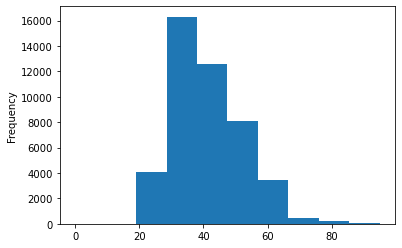

In [35]:
#plot the histogram of age variable.
inp1.age.plot.hist()
plt.show()

C:\Users\Public\Megha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


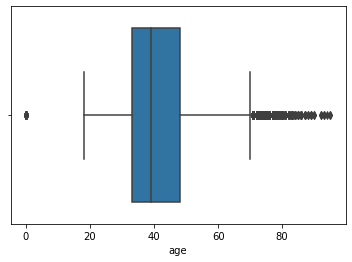

In [36]:
#plot the boxplot of age variabe
sns.boxplot(inp1.age)
plt.show()

#### Salary variable 

In [37]:
#describe the salary variable of inp1.
inp1.salary.describe()

count     45181.000000
mean      57005.046369
std       32089.163369
min           0.000000
25%       20000.000000
50%       60000.000000
75%       70000.000000
max      120000.000000
Name: salary, dtype: float64

C:\Users\Public\Megha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


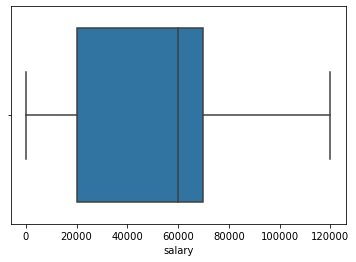

In [38]:
#plot the boxplot of salary variable.
sns.boxplot(inp1.salary)
plt.show()

#### Balance variable 

In [39]:
#describe the balance variable of inp1.
inp1.balance.describe()

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

C:\Users\Public\Megha\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance'>

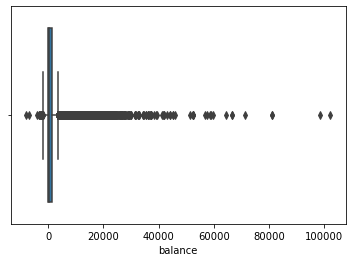

In [40]:
#plot the boxplot of balance variable.
sns.boxplot(inp1.balance)

In [41]:
#plot the boxplot of balance variable after scaling in 8:2.
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

In [42]:
#print the quantile (0.5, 0.7, 0.9, 0.95 and 0.99) of balance variable


### Segment- 6, Standardising values 

Checklist for data standardization exercises:
- **Standardise units**: Ensure all observations under one variable are expressed in a common and consistent unit, e.g., convert lbs to kg, miles/hr to km/hr, etc.
- **Scale values if required**: Make sure all the observations under one variable have a common scale.
- **Standardise precision** for better presentation of data, e.g., change 4.5312341 kg to 4.53 kg.
- **Remove extra characters** such as common prefixes/suffixes, leading/trailing/multiple spaces, etc. These are irrelevant to analysis.
- **Standardise case**: String variables may take various casing styles, e.g., UPPERCASE, lowercase, Title Case, Sentence case, etc.
- **Standardise format**: It is important to standardise the format of other elements such as date, name, etce.g., change 23/10/16 to 2016/10/23, “Modi, Narendra” to “Narendra Modi", etc.

#### Duration variable

In [43]:
#describe the duration variable of inp1
inp1.duration.head()

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
Name: duration, dtype: object

In [44]:
inp1.duration.describe()

count       45181
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [45]:
#convert the duration variable into single unit i.e. minutes. and remove the sec or min prefix.
inp1.duration=    inp1.duration.apply(lambda x:float(x.split()[0])/60 if x.find('sec')>0 else x.split()[0])

In [46]:
#describe the duration variable
inp1.duration.describe()

count     45181
unique     2646
top         1.5
freq        138
Name: duration, dtype: object

## Session- 3, Univariate Analysis 

### Segment- 2, Categorical unordered univariate analysis 

Unordered data do not have the notion of high-low, more-less etc. Example:
- Type of loan taken by a person = home, personal, auto etc.
- Organisation of a person = Sales, marketing, HR etc.
- Job category of persone.
- Marital status of any one.


#### Marital status 

In [47]:
#calculate the percentage of each marital status category. 
inp1.marital.value_counts(normalize=True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

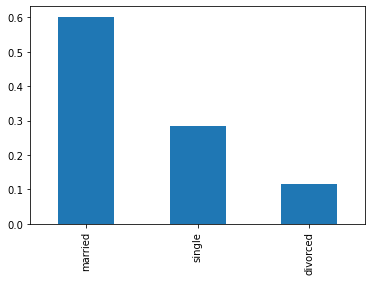

In [48]:
#plot the bar graph of percentage marital status categories
inp1.marital.value_counts(normalize=True).plot.bar()
plt.show()

#### Job  

In [49]:
#calculate the percentage of each job status category.
inp1.job.value_counts()

blue-collar      9727
management       9454
technician       7592
admin.           5166
services         4150
retired          2263
self-employed    1575
entrepreneur     1486
unemployed       1303
housemaid        1239
student           938
unknown           288
Name: job, dtype: int64

<AxesSubplot:>

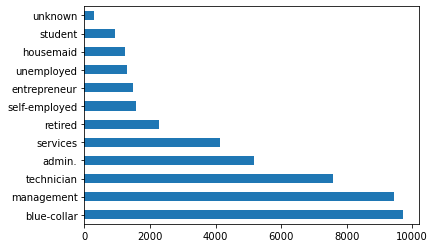

In [50]:
#plot the bar graph of percentage job categories
inp1.job.value_counts().plot.barh()

### Segment- 3, Categorical ordered univariate analysis 

Ordered variables have some kind of ordering. Some examples of bank marketing dataset are:
- Age group= <30, 30-40, 40-50 and so on.
- Month = Jan-Feb-Mar etc.
- Education = primary, secondary and so on.

#### Education

In [51]:
#calculate the percentage of each education category.
inp1.education.value_counts()

secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: education, dtype: int64

<AxesSubplot:ylabel='education'>

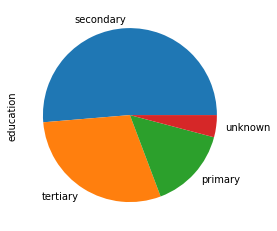

In [52]:
#plot the pie chart of education categories
inp1.education.value_counts().plot.pie()

#### poutcome 

In [53]:
#calculate the percentage of each poutcome category.
inp1.poutcome.value_counts()

unknown    36935
failure     4897
other       1839
success     1510
Name: poutcome, dtype: int64

<AxesSubplot:>

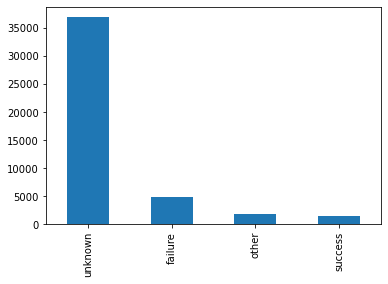

In [54]:
inp1.poutcome.value_counts().plot.bar()

#### Response the target variable 

In [55]:
#calculate the percentage of each response category.
inp1.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

<AxesSubplot:ylabel='response'>

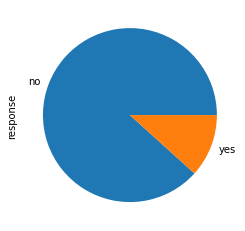

In [56]:
#plot the pie chart of response categories
inp1.response.value_counts(normalize=True).plot.pie()

## Session- 4, Bivariate and Multivariate Analysis

### Segment-2, Numeric- numeric analysis 

There are three ways to analyse the numeric- numeric data types simultaneously.
- **Scatter plot**: describes the pattern that how one variable is varying with other variable.
- **Correlation matrix**: to describe the linearity of two numeric variables.
- **Pair plot**: group of scatter plots of all numeric variables in the data frame.

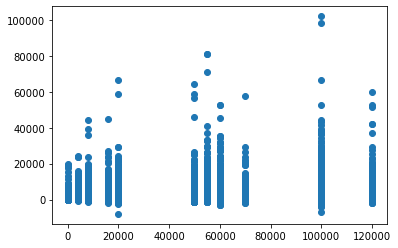

In [57]:
#plot the scatter plot of balance and salary variable in inp1
plt.scatter(inp1.salary,inp1.balance)

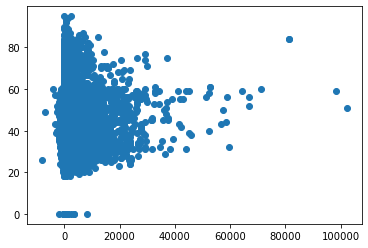

In [58]:
#plot the scatter plot of balance and age variable in inp1
plt.scatter(inp1.balance,inp1.age)

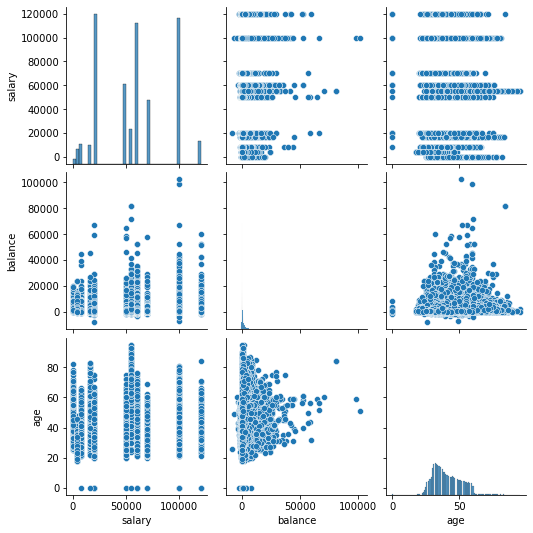

In [59]:
#plot the pair plot of salary, balance and age in inp1 dataframe.
sns.pairplot(data=inp1,vars=['salary','balance','age'])

In [60]:
inp1[['age','salary','balance']].corr()

,age,salary,balance
age,1.000000,0.024403,0.097583
salary,0.024403,1.000000,0.055453
balance,0.097583,0.055453,1.000000


#### Correlation heat map 

<AxesSubplot:>

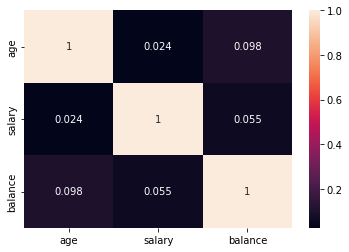

In [61]:
#plot the correlation matrix of salary, balance and age in inp1 dataframe.
sns.heatmap(inp1[['age','salary','balance']].corr() , annot=True)

### Segment- 4, Numerical categorical variable

#### Salary vs response 

In [62]:
#groupby the response to find the mean of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [63]:
#groupby the response to find the median of the salary with response no & yes seperatly.
inp1.groupby('response')['salary'].median()

response
no     60000.0
yes    60000.0
Name: salary, dtype: float64

<AxesSubplot:xlabel='response', ylabel='salary'>

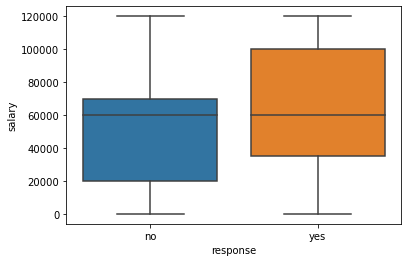

In [64]:
#plot the box plot of salary for yes & no responses.
sns.boxplot(data=inp1,x='response',y='salary')

#### Balance vs response 

<AxesSubplot:xlabel='response', ylabel='balance'>

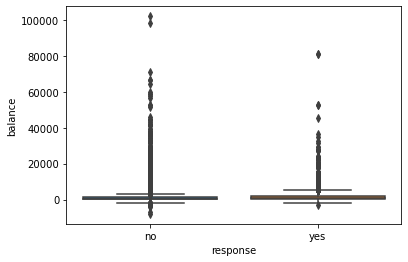

In [65]:
#plot the box plot of balance for yes & no responses.
sns.boxplot(data=inp1,x='response',y='balance')

In [66]:
#groupby the response to find the mean of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [67]:
#groupby the response to find the median of the balance with response no & yes seperatly.
inp1.groupby('response')['balance'].median()

response
no     417.0
yes    733.0
Name: balance, dtype: float64

##### 75th percentile 

In [68]:
#function to find the 75th percentile.
def p75(x):
    return np.quantile(x, 0.75)

In [69]:
#calculate the mean, median and 75th percentile of balance with response
inp1.groupby('response')['balance'].aggregate(['mean','median',p75])

,mean,median,p75
response,,,
no,1304.094525,417.0,1345.0
yes,1804.832041,733.0,2159.5


<AxesSubplot:xlabel='response'>

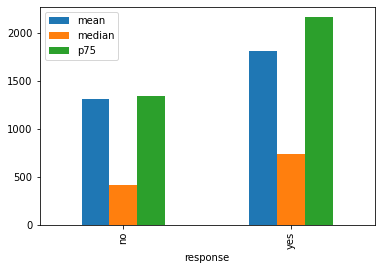

In [70]:
#plot the bar graph of balance's mean an median with response.
inp1.groupby('response')['balance'].aggregate(['mean','median',p75]).plot.bar()

#### Education vs salary 

In [71]:
#groupby the education to find the mean of the salary education category.
inp1.groupby ('education')['salary'].aggregate(['mean','median',p75])

,mean,median,p75
education,,,
primary,34220.192870,20000.0,55000.0
secondary,49739.143559,55000.0,60000.0
tertiary,82875.564249,100000.0,100000.0
unknown,46529.633621,50000.0,70000.0


In [72]:
#groupby the education to find the median of the salary for each education category.


#### Job vs salary

In [73]:
#groupby the job to find the mean of the salary for each job category.
inp1.groupby('education')['salary'].aggregate('mean')

education
primary      34220.192870
secondary    49739.143559
tertiary     82875.564249
unknown      46529.633621
Name: salary, dtype: float64

### Segment- 5, Categorical categorical variable 

In [74]:
#create response_flag of numerical data type where response "yes"= 1, "no"= 0
inp1['response_flag']=np.where(inp1.response=='yes',1,0)

In [75]:
inp1.response_flag.value_counts()

0    39894
1     5287
Name: response_flag, dtype: int64

#### Education vs response rate

In [76]:
#calculate the mean of response_flag with different education categories.
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs response rate 

In [77]:
#calculate the mean of response_flag with different marital status categories.
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

<AxesSubplot:xlabel='marital'>

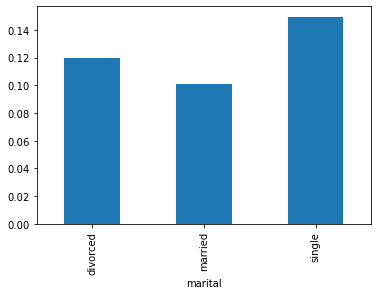

In [78]:
#plot the bar graph of marital status with average value of response_flag
inp1.groupby('marital')['response_flag'].mean().plot.bar()

#### Loans vs response rate 

<AxesSubplot:xlabel='loan'>

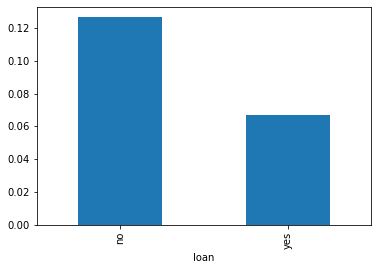

In [79]:
#plot the bar graph of personal loan status with average value of response_flag
inp1.groupby('loan')['response_flag'].mean().plot.bar()

#### Housing loans vs response rate 

In [80]:
#plot the bar graph of housing loan status with average value of response_flag


#### Age vs response 

<AxesSubplot:xlabel='age'>

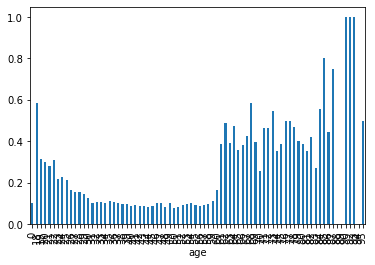

In [81]:
#plot the boxplot of age with response_flag
inp1.groupby('age')['response_flag'].mean().plot.bar()

<AxesSubplot:xlabel='response', ylabel='age'>

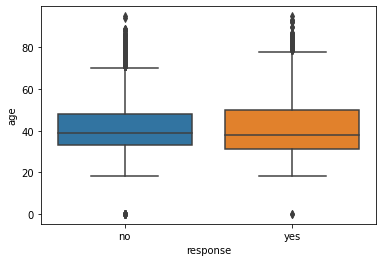

In [82]:
sns.boxplot(data=inp1,x='response',y='age')

##### making buckets from age columns 

In [83]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from age column.
pd.cut(inp1.age,[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])

0        50-60
1        40-50
2        30-40
3        40-50
4        30-40
         ...  
45206    50-60
45207      60+
45208      60+
45209    50-60
45210    30-40
Name: age, Length: 45181, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [84]:
#plot the percentage of each buckets and average values of response_flag in each buckets. plot in subplots.
inp1['age_group']=pd.cut(inp1.age,[0,30,40,50,60,9999],labels=['<30','30-40','40-50','50-60','60+'])

In [85]:
inp1.age_group.value_counts()

30-40    17662
40-50    11231
50-60     8057
<30       7025
60+       1186
Name: age_group, dtype: int64

### Segment-6, Multivariate analysis 

#### Education vs marital vs response 

In [86]:
#create heat map of education vs marital vs response_flag
res=pd.pivot_table(data=inp1,index='education',columns='marital',values='response_flag')

<AxesSubplot:xlabel='marital', ylabel='education'>

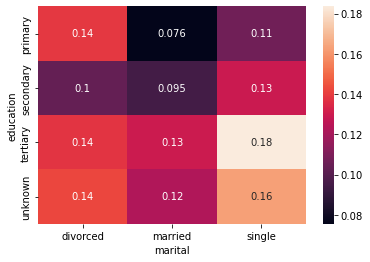

In [87]:
sns.heatmap(res,annot=True)

<AxesSubplot:xlabel='marital', ylabel='education'>

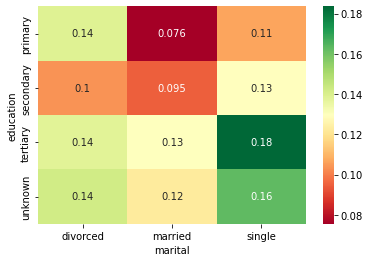

In [88]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

#### Job vs marital vs response 

In [89]:
#create the heat map of Job vs marital vs response_flag.
res=pd.pivot_table(data=inp1,index='job',columns='marital',values='response_flag')

<AxesSubplot:xlabel='marital', ylabel='job'>

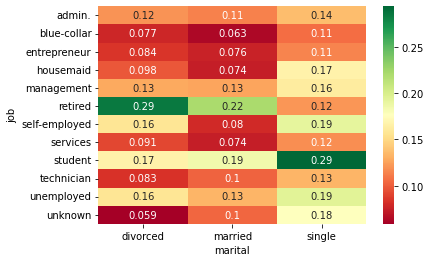

In [90]:
sns.heatmap(res,annot=True,cmap="RdYlGn")

In [91]:
inp1[inp1.pdays>0].response_flag.mean()

0.23088110532056721

In [92]:
res=pd.pivot_table(data=inp1,index='education',columns='poutcome',values='response_flag')

#### Education vs poutcome vs response

<AxesSubplot:xlabel='poutcome', ylabel='education'>

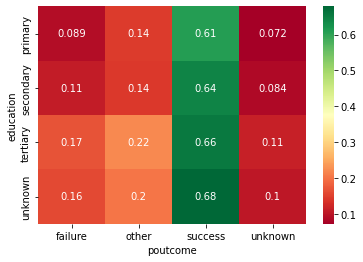

In [93]:
#create the heat map of education vs poutcome vs response_flag.
sns.heatmap(res,annot=True,cmap="RdYlGn")